In [22]:
import keras
#Importing the CIFAR-10 dataset
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.constraints import max_norm
import matplotlib.pyplot as plt

In [23]:
img_width, img_height         = 32, 32
batch_size                    = 250
no_epochs                     = 55
no_classes                    = 10
validation_split              = 0.2
verbosity                     = 1
max_norm_value                = 2.0

In [24]:
#Loading the CIFAR10 dataset
(input_train, target_train), (input_test, target_test) = cifar10.load_data()

In [25]:
if K.image_data_format() == 'channels_first':
    input_train = input_train.reshape(input_train.shape[0],3, img_width, img_height)
    input_test = input_test.reshape(input_test.shape[0], 3, img_width, img_height)
    input_shape = (3, img_width, img_height)
else:
    input_train = input_train.reshape(input_train.shape[0], img_width, img_height, 3)
    input_test = input_test.reshape(input_test.shape[0], img_width, img_height, 3)
    input_shape = (img_width  , img_height, 3)

In [26]:
#Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

In [27]:
#Normalize data
input_train = input_train / 255
input_test = input_test / 255

In [28]:
#Convert target vectors to categorical targets
target_train = keras.utils.to_categorical(target_train, no_classes)
target_test = keras.utils.to_categorical(target_test, no_classes)

In [29]:
#Model without dropout
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), kernel_constraint=max_norm(max_norm_value), activation='relu', input_shape=input_shape, kernel_initializer='he_uniform'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), kernel_constraint=max_norm(max_norm_value), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_constraint=max_norm(max_norm_value), kernel_initializer='he_uniform'))
model.add(Dense(no_classes, activation='softmax'))

In [30]:
#Compile the model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
#Fit data to model
plot_graph=model.fit(input_train, target_train,
          batch_size=batch_size,
          epochs=no_epochs,
          verbose=verbosity,
          validation_split=validation_split
)

Epoch 1/55
160/160 [==============================] - 24s 149ms/step - loss: 1.6539 - accuracy: 0.4130 - val_loss: 1.3557 - val_accuracy: 0.5220
Epoch 2/55
160/160 [==============================] - 23s 147ms/step - loss: 1.2470 - accuracy: 0.5592 - val_loss: 1.1681 - val_accuracy: 0.5905
Epoch 3/55
160/160 [==============================] - 24s 148ms/step - loss: 1.0918 - accuracy: 0.6168 - val_loss: 1.1021 - val_accuracy: 0.6149
Epoch 4/55
160/160 [==============================] - 24s 148ms/step - loss: 0.9783 - accuracy: 0.6585 - val_loss: 1.0482 - val_accuracy: 0.6354
Epoch 5/55
160/160 [==============================] - 24s 148ms/step - loss: 0.8989 - accuracy: 0.6870 - val_loss: 1.0139 - val_accuracy: 0.6479
Epoch 6/55
160/160 [==============================] - 24s 151ms/step - loss: 0.8307 - accuracy: 0.7120 - val_loss: 0.9665 - val_accuracy: 0.6696
Epoch 7/55
160/160 [==============================] - 24s 148ms/step - loss: 0.7621 - accuracy: 0.7387 - val_loss: 0.9513 - val_ac

In [33]:
#Generate generalization metrics
score = model.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 2.1292965412139893 / Test accuracy: 0.6991999745368958


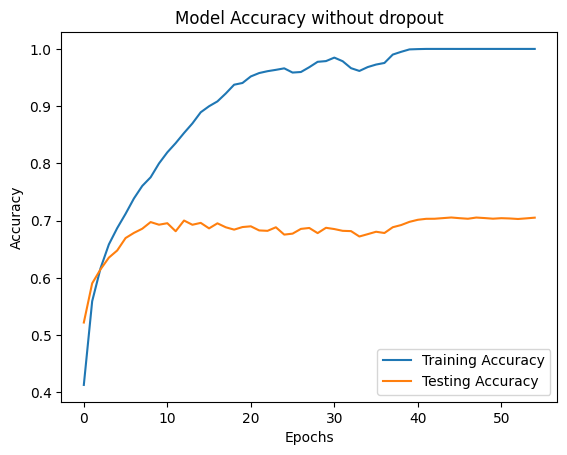

In [34]:
#Plot the graph
plt.plot(plot_graph.history['accuracy'], label='Training Accuracy')
plt.plot(plot_graph.history['val_accuracy'], label='Testing Accuracy')
plt.title('Model Accuracy without dropout')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [35]:
#Model with dropout
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), kernel_constraint=max_norm(max_norm_value), activation='relu', input_shape=input_shape, kernel_initializer='he_uniform'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#Dropout 
model.add(Dropout(0.50))
model.add(Conv2D(64, kernel_size=(3, 3), kernel_constraint=max_norm(max_norm_value), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#Dropout
model.add(Dropout(0.50))
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_constraint=max_norm(max_norm_value), kernel_initializer='he_uniform'))
model.add(Dense(no_classes, activation='softmax'))

In [36]:
#Compile the model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
#Fit data to model
plot_graph=model.fit(input_train, target_train,
          batch_size=batch_size,
          epochs=no_epochs,
          verbose=verbosity,
          validation_split=validation_split
)

Epoch 1/55
160/160 [==============================] - 28s 168ms/step - loss: 2.2848 - accuracy: 0.1646 - val_loss: 1.9596 - val_accuracy: 0.3277
Epoch 2/55
160/160 [==============================] - 26s 165ms/step - loss: 1.7828 - accuracy: 0.3463 - val_loss: 1.6585 - val_accuracy: 0.4128
Epoch 3/55
160/160 [==============================] - 27s 167ms/step - loss: 1.5775 - accuracy: 0.4272 - val_loss: 1.4414 - val_accuracy: 0.4881
Epoch 4/55
160/160 [==============================] - 27s 169ms/step - loss: 1.4246 - accuracy: 0.4888 - val_loss: 1.2938 - val_accuracy: 0.5452
Epoch 5/55
160/160 [==============================] - 27s 166ms/step - loss: 1.3137 - accuracy: 0.5317 - val_loss: 1.1848 - val_accuracy: 0.5949
Epoch 6/55
160/160 [==============================] - 27s 168ms/step - loss: 1.2327 - accuracy: 0.5620 - val_loss: 1.1303 - val_accuracy: 0.6169
Epoch 7/55
160/160 [==============================] - 27s 166ms/step - loss: 1.1577 - accuracy: 0.5920 - val_loss: 1.0583 - val_ac

In [37]:
#Generate generalization metrics
score = model.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.828391969203949 / Test accuracy: 0.7315000295639038


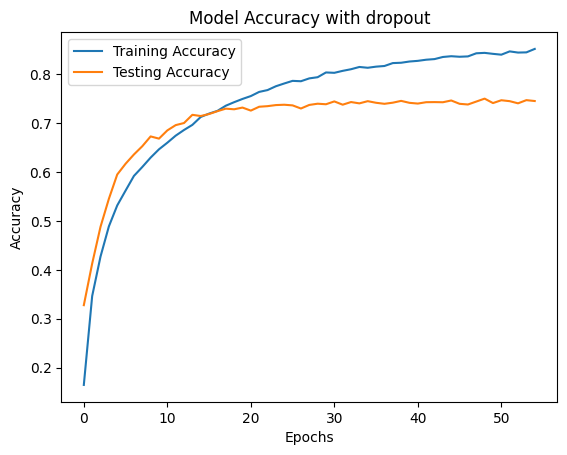

In [38]:
#Plot the graph
plt.plot(plot_graph.history['accuracy'], label='Training Accuracy')
plt.plot(plot_graph.history['val_accuracy'], label='Testing Accuracy')
plt.title('Model Accuracy with dropout')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()